In [ ]:
#sample

In [ ]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'XtA6FQz8BHQ'

YouTubeVideo(YOUTUBE_ID)

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID

In [ ]:
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4

In [ ]:
#

In [29]:
!OpenFace/build/bin/FaceLandmarkVidMulti -f OpenFace/samples/multi_face.avi

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: OpenFace/build/bin/model/model_eye/main_c

# Producing Intermediate Files
### input videos
Short videos of *one* person, seated [insert calibration settings here].
### landmarked videos

### CSV with landmarked info
Output format as detailed at https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format/79e79cc5405d35b268e89f0564fe084ab972dc36. 

In [2]:
# clear any previous outputs.
#!rm -rf processed
# detect poses on the these 10 seconds.
!OpenFace/build/bin/FaceLandmarkVidMulti -f Vid_Cal/Q2.mp4 -out_dir processed
# convert the result into MP4
!mkdir -p int_landmarked
!ffmpeg -y -loglevel info -i processed/Q2.avi int_landmarked/Q2.mp4

Could not find the HAAR face detector location
Reading the landmark detector/tracker from: OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of.dat....Done
Reading part based module....left_eye_28
Reading the landmark detector/tracker from: OpenFace/build/bin/model/model_eye/main_c

In [46]:
# To visualize result
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('int_landmarked/Q2.mp4', width=960, height=720)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import sys
import numpy
#import seaborn as sns

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#sns.set_style('white')

# Load data
df = pd.read_csv('processed/Q2.csv')
# Remove empty spaces in column names.
df.columns = [col.replace(" ", "") for col in df.columns]
# Print few values of data.
print(f"Max number of frames {df.frame.max()}", f"\nTotal shape of dataframe {df.shape}")
df.head(10)

Max number of frames 433 
Total shape of dataframe (433, 714)


frame  face_id  timestamp  confidence  success  gaze_0_x  gaze_0_y  \
0      1        0      0.000        0.98        1  0.041454  0.165817   
1      2        0      0.033        0.98        1  0.042632  0.161728   
2      3        0      0.067        0.98        1  0.042848  0.157964   
3      4        0      0.100        0.98        1  0.051005  0.153395   
4      5        0      0.133        0.98        1  0.038416  0.165209   
5      6        0      0.167        0.98        1  0.051777  0.158586   
6      7        0      0.200        0.98        1  0.049805  0.164412   
7      8        0      0.233        0.98        1  0.051008  0.165658   
8      9        0      0.267        0.98        1  0.057189  0.176338   
9     10        0      0.300        0.98        1  0.078255  0.187557   

   gaze_0_z  gaze_1_x  gaze_1_y  ...  AU12_c  AU14_c  AU15_c  AU17_c  AU20_c  \
0 -0.985285 -0.217501  0.166463  ...     0.0     0.0     0.0     0.0     0.0   
1 -0.985914 -0.224688  0.153411  ...     0.0     0.0     0.0     0.0     0.0   
2 -0.986515 -0.220009  0.154218  ...     0.0     0.0     0.0     0.0     0.0   
3 -0.986848 -0.220457  0.143034  ...     0.0     0.0     0.0     0.0     0.0   
4 -0.985510 -0.215161  0.156222  ...     0.0     0.0     0.0     0.0     0.0   
5 -0.985987 -0.218357  0.154632  ...     0.0     0.0     0.0     0.0     0.0   
6 -0.985133 -0.217133  0.156933  ...     0.0     0.0     0.0     0.0     0.0   
7 -0.984863 -0.218718  0.153456  ...     0.0     0.0     0.0     0.0     0.0   
8 -0.982667 -0.220390  0.155267  ...     0.0     0.0     0.0     0.0     0.0   
9 -0.979132 -0.220347  0.145000  ...     0.0     0.0     0.0     0.0     0.0   

   AU23_c  AU25_c  AU26_c  AU28_c  AU45_c  
0     0.0     1.0     1.0     0.0     0.0  
1     0.0     1.0     1.0     0.0     0.0  
2     0.0     1.0     1.0     0.0     0.0  
3     0.0     1.0     0.0     0.0     0.0  
4     0.0     1.0     0.0     0.0     0.0  
5     0.0     1.0     1.0     0.0     0.0  
6     0.0     1.0     0.0     0.0     0.0  
7     0.0     1.0     0.0     0.0     0.0  
8     0.0     1.0     1.0     0.0     0.0  
9     0.0     1.0     1.0     0.0     0.0  

[10 rows x 714 columns]

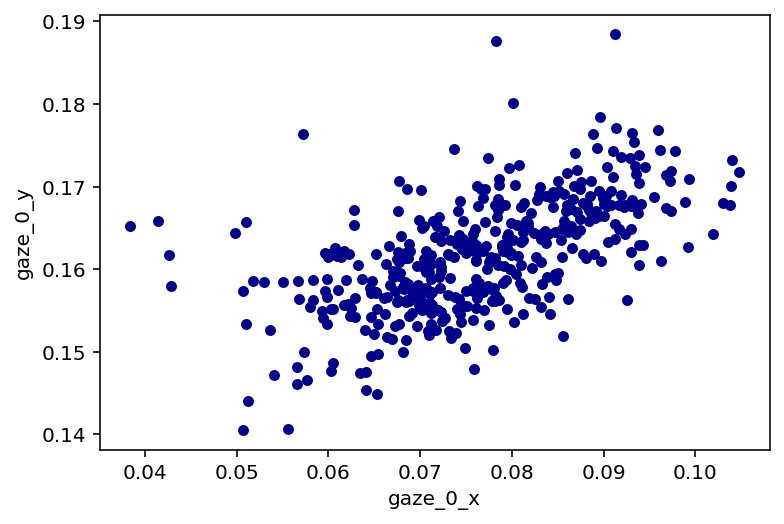

In [6]:
ax1 = df.plot.scatter(x='gaze_0_x', y='gaze_0_y', c='DarkBlue')

# Plotting

In [12]:
# Load data
df_Q1 = pd.read_csv('processed/Q1.csv')
df_Q2 = pd.read_csv('processed/Q2.csv')
df_Q3 = pd.read_csv('processed/Q3.csv')
df_Q4 = pd.read_csv('processed/Q4.csv')
df_CC = pd.read_csv('processed/CC.csv')

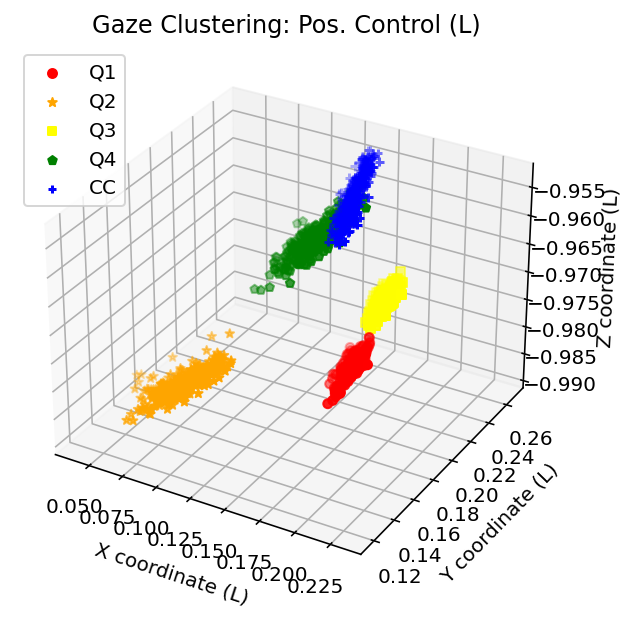

In [29]:
title = 'Gaze Clustering: Pos. Control (L)'
tag = 'PosCon_L'
fig0 = plt.figure(figsize=(5, 5))
ax = fig0.add_subplot(projection='3d')
ax.set_title(title)
ax.set_xlabel('X coordinate (L)')
ax.set_ylabel('Y coordinate (L)')
ax.set_zlabel('Z coordinate (L)')
ax.scatter(df_Q1['gaze_0_x'], df_Q1['gaze_0_y'], df_Q1['gaze_0_z'], color='red', marker='o', label='Q1')
ax.scatter(df_Q2['gaze_0_x'], df_Q2['gaze_0_y'], df_Q2['gaze_0_z'], color='orange', marker='*', label='Q2')
ax.scatter(df_Q3['gaze_0_x'], df_Q3['gaze_0_y'], df_Q3['gaze_0_z'], color='yellow', marker='s', label='Q3')
ax.scatter(df_Q4['gaze_0_x'], df_Q4['gaze_0_y'], df_Q4['gaze_0_z'], color='green', marker='p', label='Q4')
ax.scatter(df_CC['gaze_0_x'], df_CC['gaze_0_y'], df_CC['gaze_0_z'], color='blue', marker='+', label='CC')
ax.legend(loc="upper left")
plt.savefig('figs/'+tag+'.jpg')

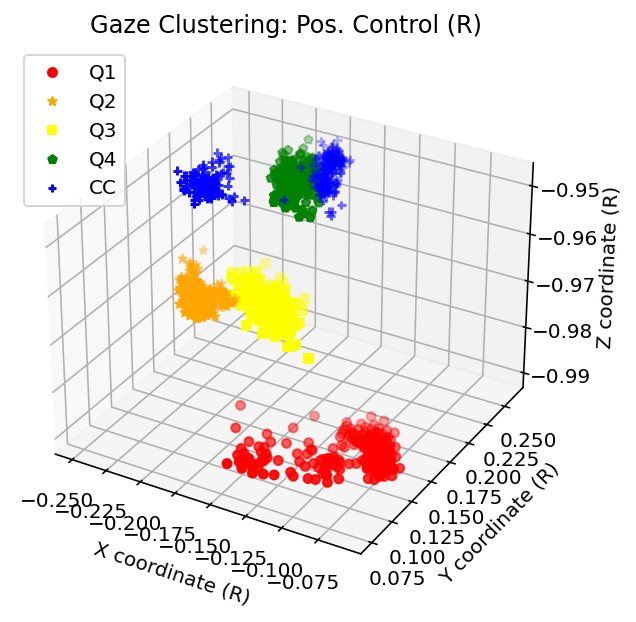

In [30]:
title='Gaze Clustering: Pos. Control (R)'
tag = 'PosCon_R'

fig1 = plt.figure(figsize=(5, 5))
ax = fig1.add_subplot(projection='3d')
ax.set_title(title)
ax.set_xlabel('X coordinate (R)')
ax.set_ylabel('Y coordinate (R)')
ax.set_zlabel('Z coordinate (R)')
ax.scatter(df_Q1['gaze_1_x'], df_Q1['gaze_1_y'], df_Q1['gaze_1_z'], color='red', marker='o', label='Q1')
ax.scatter(df_Q2['gaze_1_x'], df_Q2['gaze_1_y'], df_Q2['gaze_1_z'], color='orange', marker='*', label='Q2')
ax.scatter(df_Q3['gaze_1_x'], df_Q3['gaze_1_y'], df_Q3['gaze_1_z'], color='yellow', marker='s', label='Q3')
ax.scatter(df_Q4['gaze_1_x'], df_Q4['gaze_1_y'], df_Q4['gaze_1_z'], color='green', marker='p', label='Q4')
ax.scatter(df_CC['gaze_1_x'], df_CC['gaze_1_y'], df_CC['gaze_1_z'], color='blue', marker='+', label='CC')
ax.legend(loc="upper left")
plt.savefig('figs/'+tag+'.jpg')

In [31]:
# MISC

In [ ]:
# see label definitions at https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format/79e79cc5405d35b268e89f0564fe084ab972dc36

numpy.set_printoptions(threshold=sys.maxsize)
print((df.columns).tolist())